<a href="https://colab.research.google.com/github/Gallano16/HOA5.2/blob/main/Assignment_5_2_Build_and_Apply_Multilayer_Perceptron_Gallano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ACTIVITY NO. 4** | Advanced Data Analytics and Machine Learning <br>
**Name** | Gallano,Genaro Jr. U. <br>
**Section** | CPE32S1 <br>
**Date Performed**: | 6/23/2024 <br>
**Date Submitted**: |6/23/2024 <br>
**Instructor**: | Engr.Roman Richard

# **Choose any Dataset**



**Introduction**

I have chosen the dataset regarding the classification of a Heart Disease that stands as the leading cause of global mortality, encompassing conditions like coronary heart disease, cerebrovascular disease, and others affecting the heart and blood vessels. Annually, approximately 17.9 million individuals succumb to CVDs, with heart attacks and strokes claiming over four-fifths of these lives, a third of which occur before the age of 70. To address this, a comprehensive database focusing on factors contributing to heart attacks has been established. The primary objective is to compile characteristics relevant to heart attacks. The dataset comprises 1319 samples, featuring nine fields. Eight fields encompass input parameters such as age, gender (0 for Female, 1 for Male), heart rate, systolic and diastolic blood pressure, blood sugar levels, CK-MB, and Test-Troponin readings. The remaining field denotes the output parameter indicating the presence or absence of a heart attack, categorized as negative (absence) or positive (presence), respectively.






# **Explain the problem you are trying to solve**

The problem being addressed here in this dataset is the classification of heart disease, which is the leading cause of global mortality that is variously cause by many important reasons that will be determined and help us individuals lessen the occurrence of it that will prevent and give awareness to all of individuals, especially who are prone to heart disease. This dataset focuses on factors contributing to heart attacks, which are a significant component of cardiovascular diseases. Given the high mortality rate associated with CVDs, particularly heart attacks and strokes, there is a pressing need to understand and predict the occurrence of these events. The dataset comprises 1319 samples, each containing information on various parameters such as age, gender, heart rate, blood pressure, blood sugar levels, and specific biochemical markers. The objective is to utilize this dataset to develop a classification model that can accurately predict the presence or absence of a heart attack based on these input parameters. This classification model can potentially aid in early detection, risk assessment, and preventive measures against the occurrence of a heart disease, thus contributing to reducing the mortality rate associated with heart diseases.

# **Create your own model**

In [1]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [2]:
# Import necessary libraries
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Set random seed
seed = 28
numpy.random.seed(seed)

In [3]:
# Import the HeartAttack dataset
data = pd.read_csv('HeartDiseaseClassification.csv')
# Change the class column from string to (negative and positive) to boolean(1 for positive
data["class"] = data["class"].apply(lambda toLabel: 0 if toLabel == 'negative' else 1)

X = data.iloc[:,0:8] # [rows, columns]
Y = data.iloc[:,8]   # [class (Output)]

print(X.shape)
print(Y.shape)

# Change the class column from string to (negative and positive) to boolean(1 for positive

print(X)
print(Y)

(1319, 8)
(1319,)
      age  gender  impluse  pressurehight  pressurelow  glucose    kcm  \
0      64       1       66            160           83    160.0   1.80   
1      21       1       94             98           46    296.0   6.75   
2      55       1       64            160           77    270.0   1.99   
3      64       1       70            120           55    270.0  13.87   
4      55       1       64            112           65    300.0   1.08   
...   ...     ...      ...            ...          ...      ...    ...   
1314   44       1       94            122           67    204.0   1.63   
1315   66       1       84            125           55    149.0   1.33   
1316   45       1       85            168          104     96.0   1.24   
1317   54       1       58            117           68    443.0   5.80   
1318   51       1       94            157           79    134.0  50.89   

      troponin  
0        0.012  
1        1.060  
2        0.003  
3        0.122  
4       

In [4]:
# create model
model = Sequential()
model.add(Dense(120, input_dim=8, kernel_initializer= 'glorot_uniform' , activation= 'relu'))
model.add(Dense(64, kernel_initializer= 'glorot_uniform' , activation= 'relu' ))
model.add(Dense(32, kernel_initializer= 'glorot_uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'glorot_uniform' , activation= 'sigmoid' ))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 120)                 │           1,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           7,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,937 (42.72 KB)

 Trainable params: 10,937 (42.72 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer ='rmsprop', metrics = ['accuracy'])

In [6]:
# Fit the model
history = model.fit(X, Y, epochs=800, batch_size=80)
history.history.keys()

Epoch 1/800
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5493 - loss: 4.4698
Epoch 2/800
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5434 - loss: 1.8587
Epoch 3/800
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5669 - loss: 1.5741
Epoch 4/800
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5831 - loss: 1.3562 
Epoch 5/800
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6092 - loss: 1.0883 
Epoch 6/800
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6088 - loss: 1.1965
Epoch 7/800
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5983 - loss: 0.9577 
Epoch 8/800
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6092 - loss: 1.0416 
Epoch 9/800
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6051 - loss: 0.9621 
Epoch 10/800
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6504 - loss: 0.7219 
Epoch 11/800
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5846 - loss: 0.9510
Epoch 12/800
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc

dict_keys(['accuracy', 'loss'])

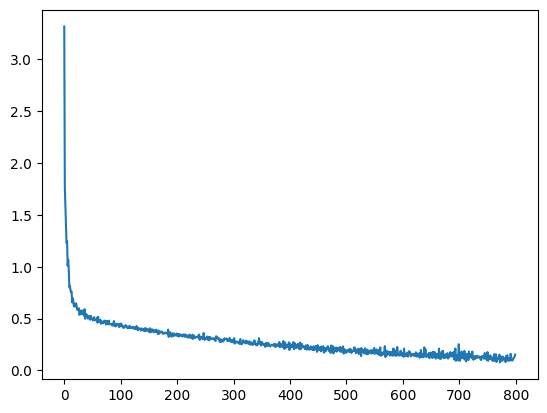

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])


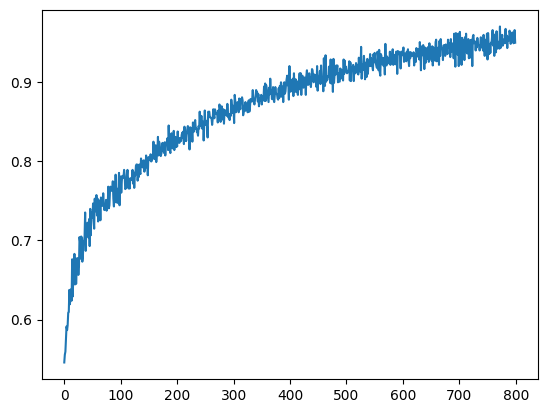

In [8]:
plt.plot(history.history['accuracy'])

# **Evaluate the accuracy of your model**

In [9]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9751 - loss: 0.0698  
compile_metrics: 97.88%
loss: 6.61%


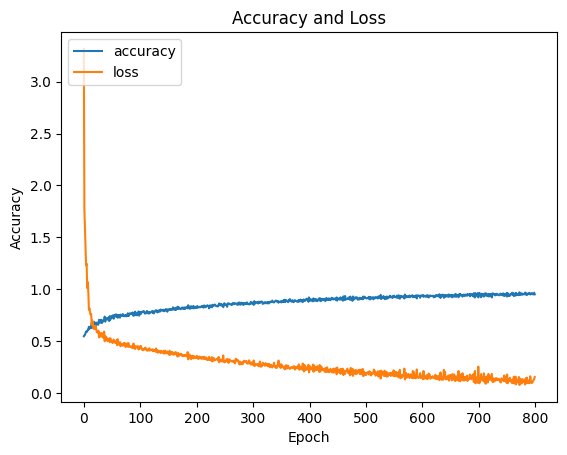

In [10]:
import matplotlib.pyplot as plt
def plot_history(history):

 plt.plot(history.history['accuracy'])
 plt.plot(history.history['loss'])
 plt.title('Accuracy and Loss')
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')
 plt.legend(['accuracy', 'loss'], loc='upper left')
 plt.show()

plot_history(history)

# **Conclusion**

- In conclusion, this assignment about the implementation of a multilayer perceptron has given me the opportunity to successfully execute the needed objectives wherein because of the MLP, the dataset being chosen which is the heart disease classification has been handled well. Even though there's complexity on the relationships within the given dataset, it can be seen that the functionality of MLP has still accurately and precisely resulted a good visualization that led to the improvement of determining the classification of a heart disease even if its a symptom or currently occurring.